In [13]:
import numpy as np
import nmrformd as NMR
import MDAnalysis as mda
import matplotlib.pyplot as plt

In [3]:
u = mda.Universe("topology.tpr","trajectory.xtc")

In [4]:
n_molecules = u.atoms.select_atoms("type OW").atoms.n_atoms
print(f"The number of water molecules is {n_molecules}")
timestep = np.round(u.trajectory.dt,2)
print(f"The timestep is {timestep} ps")
total_time = np.round(u.trajectory.totaltime,2)
print(f"The total simulation time is {total_time} ps")

The number of water molecules is 400
The timestep is 0.2 ps
The total simulation time is 100.0 ps


In [5]:
group_i = "type HW"
group_j = "type HW"

In [6]:
u.atoms.select_atoms(group_i)

<AtomGroup with 800 atoms>

In [7]:
analysis = "full"

In [10]:
n_i = 0

In [11]:
nmr_result = NMR.NMR(u, group_i, group_j, analysis, n_i, "m0")

In [12]:
T1 = np.round(nmr_result.T1,2)
print(f"NMR relaxation time T1 = {T1} s")
T2 = np.round(nmr_result.T2,2)
print(f"NMR relaxation time  T2 = {T2} s")
tau = np.round(nmr_result.tau,2)
print(f"Correlation time = {tau} ps")

NMR relaxation time T1 = 2.58 s
NMR relaxation time  T2 = 2.58 s
Correlation time = 3.75 ps


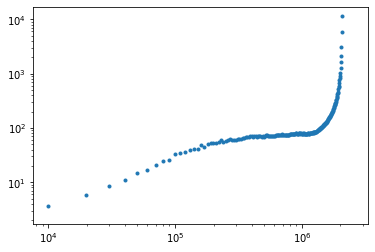

In [17]:
plt.loglog(nmr_result.f,1/nmr_result.R1,'.')

In [22]:
np.savetxt("data.dat", np.vstack([nmr_result.f,1/nmr_result.R1]).T)